In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

from numpy.polynomial.polynomial import polyvander
import random
from scipy.optimize import minimize
from sklearn import linear_model



temp = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])

y = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
A = polyvander(y, 10) #Vandermonde matrix i.e each row has the form: 1, y[i]^1,y[i]^2,...,y[i]^10


#Notice the given system is over determined


In [8]:
lam = 0.1

a1 = np.linalg.pinv(polyvander(y, 10)) @ temp
temp1 = polyvander(y, 10) @ a1
e1 = np.linalg.norm(temp-temp1,ord=2)/np.linalg.norm(temp,ord=2)
    
regr2 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
regr2.fit(polyvander(y, 10), temp)  
a2 = regr2.coef_
temp2 = polyvander(y, 10) @ a2
e2 = np.linalg.norm(temp-(temp2+75),ord=2)/np.linalg.norm(temp,ord=2)

ridge = linear_model.Ridge(alpha=1.0).fit(polyvander(y, 10),temp)
a3 = ridge.coef_
temp3 = polyvander(y, 10) @ a3
e3 = np.linalg.norm(temp-(temp3+75),ord=2)/np.linalg.norm(temp,ord=2)

regr4 = linear_model.Lasso(alpha=1)
regr4.fit(polyvander(y, 10), temp)  
a4 = regr4.coef_
temp4 = polyvander(y, 10) @ a4
e4 = np.linalg.norm(temp-(temp4+75),ord=2)/np.linalg.norm(temp,ord=2)

C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.595858893835603, tolerance: 0.21445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.059172710290227, tolerance: 0.21445
  model = cd_fast.enet_coordinate_descent(


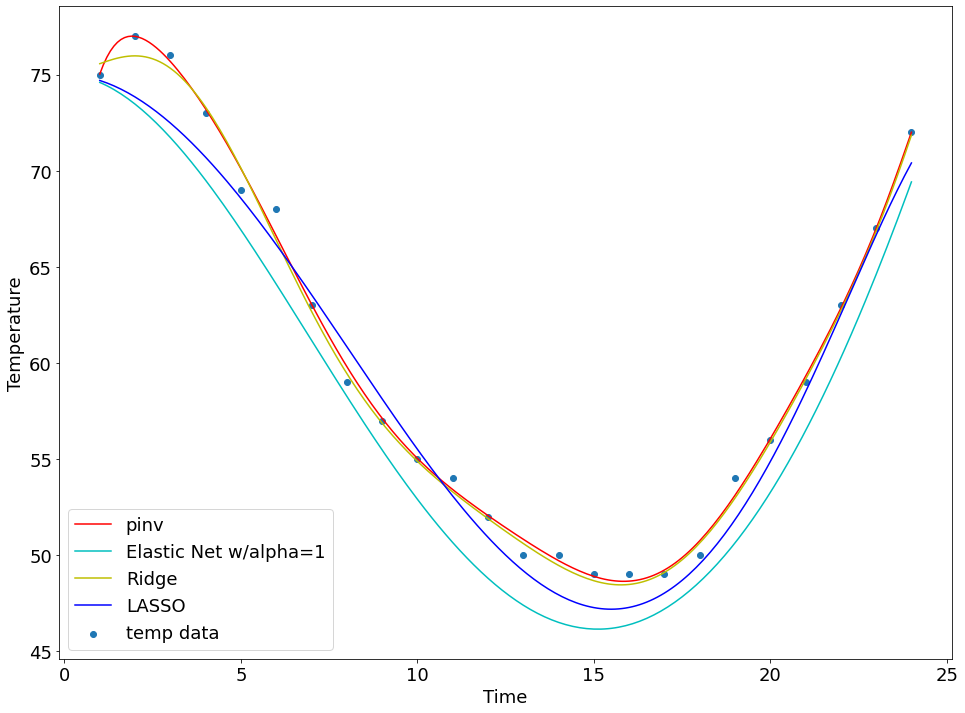

The pinv error is  0.008700849821402913
The Elastic Net error is  0.044691369955466104
The Ridge error is  0.010195912086555759
The LASSO error is  0.02581737565676171


In [9]:
def f(x,coefficents):
    sum = 0
    for i in range(11):
        sum = sum +coefficents[i]*x**i
    return sum

x=np.arange(1,24.1,0.1)
y1=[0]*len(x)    
y2=[0]*len(x)
y3=[0]*len(x)
y4=[0]*len(x)
for i in range(len(x)):
    y1[i]=f(x[i],a1)
    y2[i]=f(x[i],a2)+75
    y3[i]=f(x[i],a3)+75
    y4[i]=f(x[i],a4)+75

    
plt.scatter(y, temp, label = 'temp data')
plt.plot(x,y1, 'r-', label ='pinv')
plt.plot(x,y2, 'c-', label = 'Elastic Net w/alpha=1')
plt.plot(x,y3, 'y-', label ='Ridge')
plt.plot(x,y4, 'b-', label ='LASSO')
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.legend()
plt.show()


print('The pinv error is ', e1)
print('The Elastic Net error is ', e2)
print('The Ridge error is ', e3)
print('The LASSO error is ', e4)

C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1567.7614637492081, tolerance: 0.5627958333333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1735.4562353310737, tolerance: 0.5627958333333334
  model = cd_fast.enet_coordinate_descent(


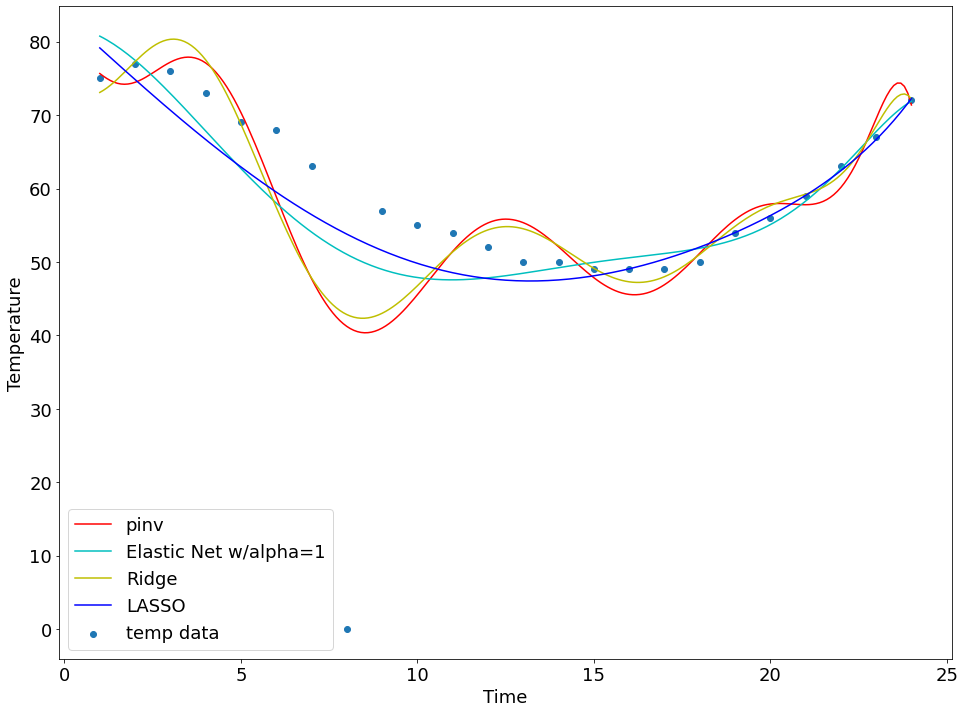

The pinv error is  0.17004430427443587
The Elastic Net error is  0.18960140718282703
The Ridge error is  0.1718375255653562
The LASSO error is  0.19494065876544947


In [30]:
#corrupt one measurment
temp[7]=0

#repeat experiment with corrupted measurment:

lam = 0.1

a1 = np.linalg.pinv(polyvander(y, 10)) @ temp
temp1 = polyvander(y, 10) @ a1

    
regr2 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
regr2.fit(polyvander(y, 10), temp)  
a2 = regr2.coef_
temp2 = polyvander(y, 10) @ a2


ridge = linear_model.Ridge(alpha=1.0).fit(polyvander(y, 10),temp)
a3 = ridge.coef_
temp3 = polyvander(y, 10) @ a3


regr4 = linear_model.Lasso(alpha=1)
regr4.fit(polyvander(y, 10), temp)  
a4 = regr4.coef_
temp4 = polyvander(y, 10) @ a4


e1 = np.linalg.norm(temp-temp1,ord=2)/np.linalg.norm(temp,ord=2)
#e2 = np.linalg.norm(temp-(temp2+85),ord=2)/np.linalg.norm(temp,ord=2)
#e3 = np.linalg.norm(temp-(temp3+75),ord=2)/np.linalg.norm(temp,ord=2)
#e4 = np.linalg.norm(temp-(temp4+85),ord=2)/np.linalg.norm(temp,ord=2)


#find best values to shift temperature estimates (to compensate for the data centering linear.model method does)
def sortSecond(val):
    return val[1]

c1=np.arange(73,90,0.01)
c2=[0]*len(c1)
list2=[(0,0)]*len(c1)
list3=[(0,0)]*len(c1)
list4=[(0,0)]*len(c1)
for i in range(len(c1)):
    list2[i]= (c1[i],np.linalg.norm(temp-(temp2+c1[i]),ord=2)/np.linalg.norm(temp,ord=2))
    list3[i]= (c1[i],np.linalg.norm(temp-(temp3+c1[i]),ord=2)/np.linalg.norm(temp,ord=2))
    list4[i]= (c1[i],np.linalg.norm(temp-(temp4+c1[i]),ord=2)/np.linalg.norm(temp,ord=2))


list2.sort(key=sortSecond)
list3.sort(key=sortSecond)
list4.sort(key=sortSecond)

e2=list2[0][1]
e3=list3[0][1]
e4=list4[0][1]

def f(x,coefficents):
    sum = 0
    for i in range(11):
        sum = sum +coefficents[i]*x**i
    return sum

x=np.arange(1,24.1,0.1)
y1=[0]*len(x)    
y2=[0]*len(x)
y3=[0]*len(x)
y4=[0]*len(x)
for i in range(len(x)):
    y1[i]=f(x[i],a1)
    y2[i]=f(x[i],a2)+list2[0][0]
    y3[i]=f(x[i],a3)+list3[0][0]
    y4[i]=f(x[i],a4)+list4[0][0]

    
plt.scatter(y, temp, label = 'temp data')
plt.plot(x,y1, 'r-', label ='pinv')
plt.plot(x,y2, 'c-', label = 'Elastic Net w/alpha=1')
plt.plot(x,y3, 'y-', label ='Ridge')
plt.plot(x,y4, 'b-', label ='LASSO')
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.legend()
plt.show()


print('The pinv error is ', e1)
print('The Elastic Net error is ', e2)
print('The Ridge error is ', e3)
print('The LASSO error is ', e4)

It seems Lasso and Elastic Net methods are better in that they yield a curve whos slope looks consistent with the uncorrupted data. Whereas the Ridge and pinv method seem to be greatly affected by the corrupted point and yield a curve whoes slope is not consistent with the uncorrupted data even if the error if slightly better. Thus, we conclude that the Lasso and Ridge methods are more robust to outliers. Pinv method seems to be the worst affected by an outlier: It ignores the general shape of the data to accomodate for outliers.

We will now repeat the experiment but corrupt multiple data points and choose different pairs of points to corrupt by random. We can then use these trials to calculate the variance in the coefficent vector for each of the 4 models.

C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2654.4960005845396, tolerance: 0.8787625
  model = cd_fast.enet_coordinate_descent(
C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2885.5031120986755, tolerance: 0.8787625
  model = cd_fast.enet_coordinate_descent(
C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2703.

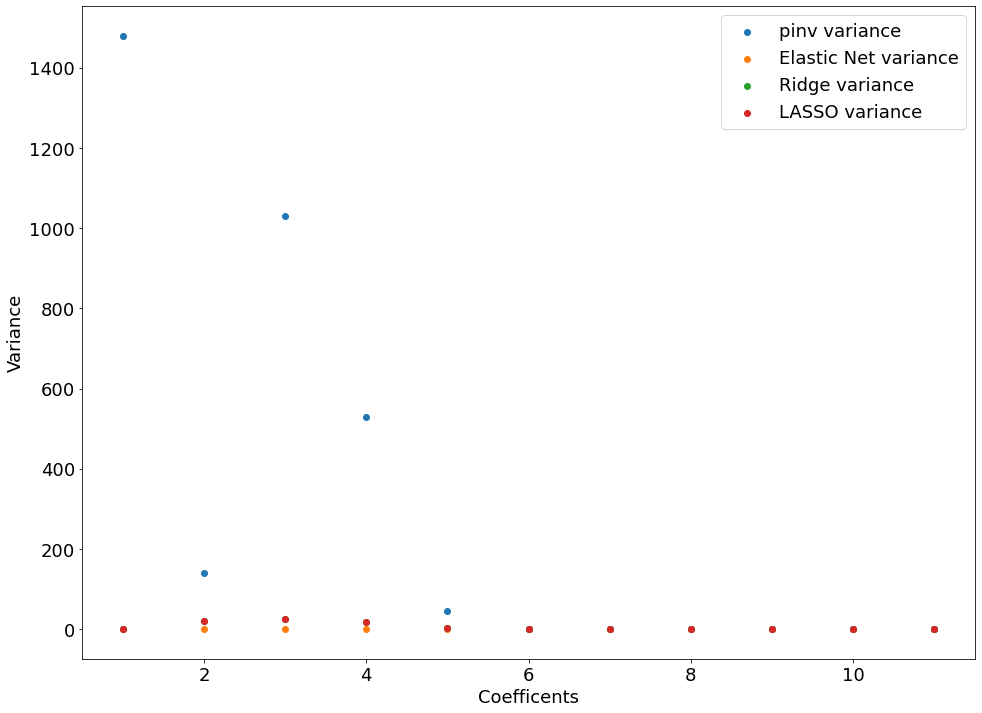

In [76]:
t=[0]*24
for i in range(24):
    t[i]=i

n=1000
A1=np.zeros([n,11])
A2=np.zeros([n,11])
A3=np.zeros([n,11])
A4=np.zeros([n,11])
for i in range(n):
    #corrupt two random points in data
    temp = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])
    index = random.sample(t, 2)
    temp[index[0]]=0
    temp[index[1]]=0
    
    #find coefficent vector estimate
    lam = 0.1

    A1[i] = np.linalg.pinv(polyvander(y, 10)) @ temp


    regr2 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr2.fit(polyvander(y, 10), temp)  
    A2[i] = regr2.coef_


    ridge = linear_model.Ridge(alpha=1.0).fit(polyvander(y, 10),temp)
    A3[i] = ridge.coef_


    regr4 = linear_model.Lasso(alpha=1)
    regr4.fit(polyvander(y, 10), temp)  
    A4[i] = regr4.coef_



 

    

#find variances in coefficent vectors for the 4 methods
v1=np.var(A1, axis=0)
v2=np.var(A2, axis=0)
v3=np.var(A3, axis=0)
v4=np.var(A4, axis=0)

#plot variances
x=[1,2,3,4,5,6,7,8,9,10,11]
plt.scatter(x, v1, label = 'pinv variance')
plt.scatter(x, v2, label = 'Elastic Net variance')
plt.scatter(x, v3, label = 'Ridge variance')
plt.scatter(x, v3, label = 'LASSO variance')
plt.ylabel('Variance')
plt.xlabel('Coefficents')
plt.legend()
plt.show()

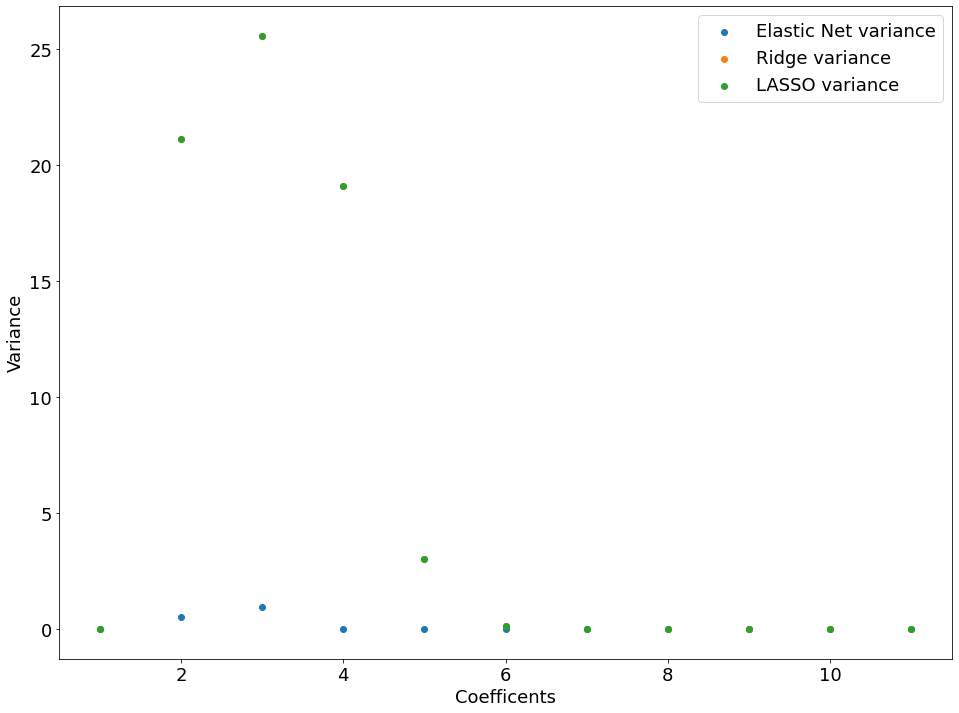

In [79]:
#plot variances but without pinv because its too big
plt.scatter(x, v2, label = 'Elastic Net variance')
plt.scatter(x, v3, label = 'Ridge variance')
plt.scatter(x, v3, label = 'LASSO variance')
plt.ylabel('Variance')
plt.xlabel('Coefficents')
plt.legend()
plt.show()

The graphs of the variances seem to confirm our original observations although now we see that Elastic Net seems to be a lot more robust than Ridge or LASSO.